In [22]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [18]:
table=pd.read_html('https://www.basketball-reference.com/leagues/NBA_2020_per_game.html')
df=table[0]
df.head(10)

Rk                    Player Pos Age   Tm   G  GS    MP   FG   FGA  ...  \
0   1              Steven Adams   C  26  OKC  63  63  26.7  4.5   7.6  ...   
1   2               Bam Adebayo  PF  22  MIA  72  72  33.6  6.1  11.0  ...   
2   3         LaMarcus Aldridge   C  34  SAS  53  53  33.1  7.4  15.0  ...   
3   4            Kyle Alexander   C  23  MIA   2   0   6.5  0.5   1.0  ...   
4   5  Nickeil Alexander-Walker  SG  21  NOP  47   1  12.6  2.1   5.7  ...   
5   6             Grayson Allen  SG  24  MEM  38   0  18.9  3.1   6.6  ...   
6   7             Jarrett Allen   C  21  BRK  70  64  26.5  4.3   6.6  ...   
7   8              Kadeem Allen  PG  27  NYK  10   0  11.7  1.9   4.4  ...   
8   9           Al-Farouq Aminu  PF  29  ORL  18   2  21.1  1.4   4.8  ...   
9  10           Justin Anderson  SG  26  BRK  10   1  10.7  1.0   3.8  ...   

    FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0  .582  3.3  6.0   9.3  2.3  0.8  1.1  1.5  1.9  10.9  
1  .691  2.4  7.8  10.2  5.1  1.1  1.3  2.8  2.5  15.9  
2  .827  1.9  5.5   7.4  2.4  0.7  1.6  1.4  2.4  18.9  
3   NaN  1.0  0.5   1.5  0.0  0.0  0.0  0.5  0.5   1.0  
4  .676  0.2  1.6   1.8  1.9  0.4  0.2  1.1  1.2   5.7  
5  .867  0.2  2.0   2.2  1.4  0.3  0.1  0.9  1.4   8.7  
6  .633  3.1  6.5   9.6  1.6  0.6  1.3  1.1  2.3  11.1  
7  .636  0.2  0.7   0.9  2.1  0.5  0.2  0.8  0.7   5.0  
8  .655  1.3  3.5   4.8  1.2  1.0  0.4  0.9  1.5   4.3  
9  .500  0.1  2.0   2.1  0.8  0.0  0.6  0.4  1.3   2.8  

[10 rows x 30 columns]

In [37]:
column_names = df.columns.tolist()
column_names.remove()

['Rk',
 'Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

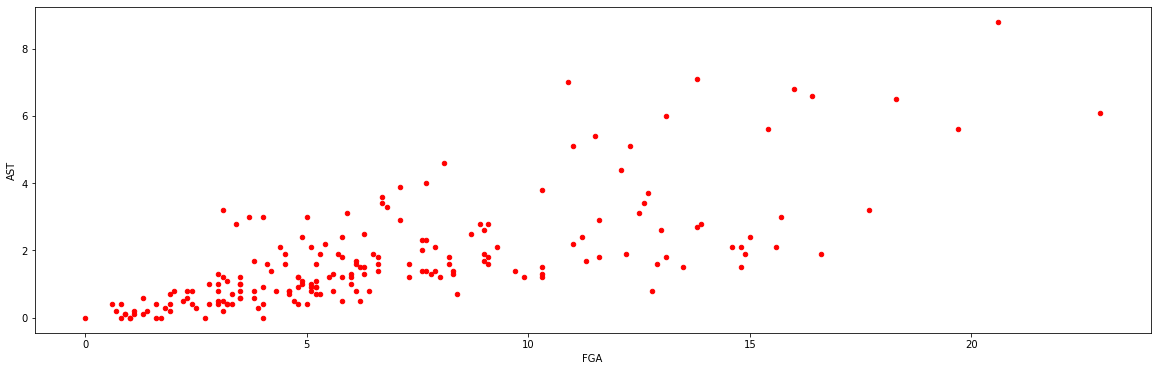

In [21]:
df=df[df.Age != "Age"]
df=df.loc[0:200,:]
df=df.astype({'AST':'float'})
df=df.astype({'FGA':'float'})
df.plot(kind='scatter', color='red', x='FGA',y='AST')
plt.rcParams["figure.figsize"] = (20,6)
plt.show()

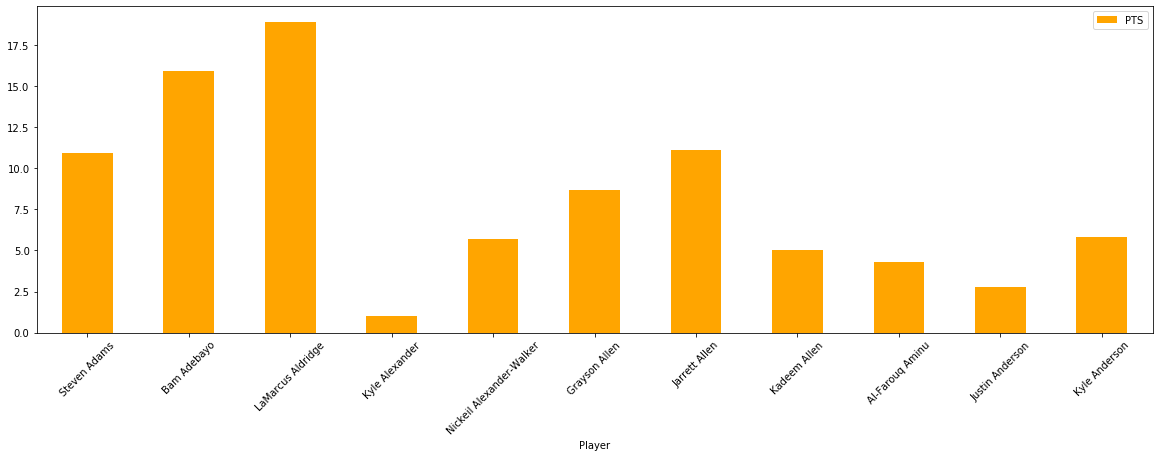

In [20]:
df=df[df.Age != "Age"]
df_top10=df.loc[0:10,:]
df_top10=df_top10.astype({'PTS':'float'})
df_top10=df_top10.astype({'FGA':'string'})
df_top10.plot(kind='bar',color='orange', x='Player',y='PTS')
plt.rcParams["figure.figsize"] = (20,6)
plt.xticks(rotation = 45)
plt.show()

In [56]:
#create a scaled dataframe

#create dataset version with only columns that have numeric values
num_data = df.drop(['Player','Pos','Tm','Rk','Age'],axis=1)
column_names = df.columns.tolist()
column_names.remove('Player')
column_names.remove('Pos')
column_names.remove('Tm')
column_names.remove('Rk')
column_names.remove('Age')

#scale the numeric data
scaler = MinMaxScaler()
num_df_scaled = scaler.fit_transform(num_data.to_numpy())
num_df_scaled = pd.DataFrame(num_df_scaled, columns=column_names)

#add the columns with string values to the scaled tata set using merge
df_scaled = pd.merge(df, num_df_scaled, left_index=True, right_index=True)
scaled_cols_list = ['Rk','Player','Pos','Age','Tm']
for column in df_scaled.columns:
    if '_y' in column:
        scaled_cols_list.append(newname)
scaled_cols_list
df_scaled = df_scaled[scaled_cols_list]
column_names_dict = {}
for column in df_scaled.columns:
    column_names_dict[column] = column.replace('_y','')
df_scaled = df_scaled.rename(columns = column_names_dict)

print("Scaled Dataset Using MinMaxScaler")
df_scaled.head()


KeyError: "['PTS'] not in index"

In [49]:
type(scaled_cols_list)

list